\begin{eqnarray}
  \text{input   }  &&  x  \\
  \text{layer 1    :} &&  x - k + 1  \\
  \text{layer 2    :}  &&  x - k + 1 - p + 1 = x -(k+p) + 2 \\
  \text{layer 3    :} &&  x - (k+p) + 2 - k +1 -p + 1 = x - 2 (k+p) + 4 \\
  &\vdots & \\
  && x - (?)(k+p) + 2( ?)
\end{eqnarray}

Entonces $1 = x - (?) (k+p) + 2 (?) $  de donde $x=??$

# AlexNet (2012)
Gano en el 2012 la competencia de Imagenet. 
Las especificaiones del concurso eran:      
* 1.2 millones de imagenes de entrenamiento
* 50 mil imagenees de validacion
* La resolucion es de 224 x 224 pixeles

El AlexNet tiene su nombre en honor a Alex Krizhevsky, trabajo en la Universidad de Toronto con Geoffrey E. Hinton ( tambien con Iliya Sutskever).
(tiene como 85% de precision en la validacion)


## Arquitectura de la red :      
Comparamos con la LeNet5.

*  **Capas convolucionales** 
:  LeNet5 tiene 2, la AlexNet tiene 5
* **Funciones de activacion**  :   En LeNet5 es tanh (en clase usamos ReLU). En la AlexNet es ReLU 
* **Pooling** :     Letnet usa AveragePooling  mientras que AlexNet usa MaxPooling

Vamos a los detalles de la implementacion :     

* Capa de entrada y primera capa convolutiva:   La capa de entrada consta de
$224 \times 224 \times 3$ (RGB). Se usan para la salida 96 filtros. El filtro (kernel) $11 \times 11$, no padding $p=0$, stride $s=4$. Calculmenos el tamano de la salida:  $(224-11)/4 + 1 = 54.25$ lo truncamos a 54. La salida tiene tamano $54 \times 54 \times 96 $. Contamos los parametros que se necesitan:       
$$ (11 \times 11 \times 3 + 1) \times 96 = 34944 $$







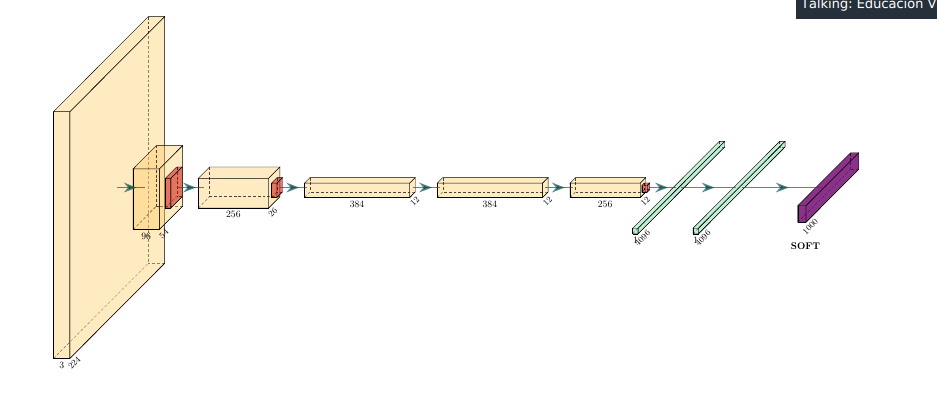

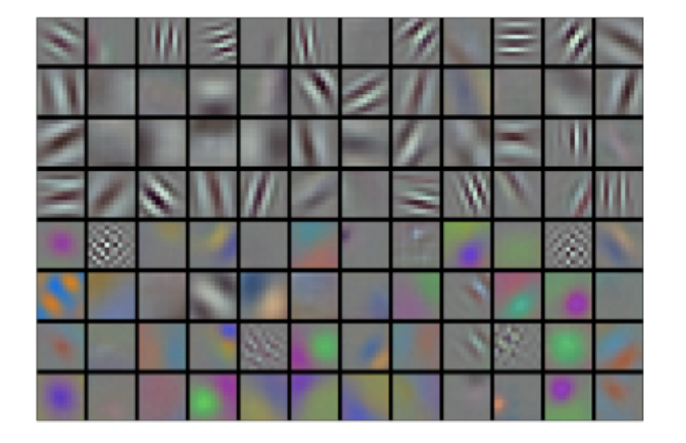

* **MaxPooling:**   Kernel de $3 \times 3$ , stride $s=2$. Como $(54-3)/2+1=25.5$ se trunca a 26 y teneos la salida del tamano $26 \times 26 \times 96$.

* **Segunda convolucion:**   El kernel es $5 \times 5$, stride $s=1$.Padding 2,
256 filtros de salida.  Tamano de salida $(26-5+2(2))/1 + 1 = 26$. La salida tiene tamano $26 \times 26  \times 256$. El numero de parametros:           
$$ (5  \times 5 \times 96 + 1) \times 256 = 614656$$ 
Se apolica una activacion ReLU.

* **MaxPooling:**  Kernel de $3 \times 3$, strides $s=2$, no padding. 
Como $(26-3)/2 + 1 = 12.5$ se trunca a 12. El tamano es $12 \times 12 \times 256$


* **Convolucion 3:**  Se usa un kernel de $3 \times 3$, $s=1$, $pad=1$ y 384 filtros de salida. Como $  (12-3 +2)/1 + 1 = 12$.  El tamano de salidas es
$12 \times 12 \times 384$. El numero de parametros es

$$ (3 \times 3 \times 256 + 1) \times 384 = 885120  $$

* **Convolucion 4:**  Se usa un kernel de $3 \times 3$ con stride $s=1$, y padding de $p=1$, con 384 filtros de salida. El tamano del tensor de salida es
$(12 -3 + 2(1))/1 +1 = 12$. La salida es de $12 \times 12 \times 384$. Los parametros son
$$ (3 \times 3 \times 384 +1) \times 384 = 1327488 $$

Tambien se aplica la activacion  ReLU

* **Convolucion 5 (ultima) :**   Tambien usa un kernel de $3 \times 3$, con stride $s=1$, 256 filtros, padding $p=1$ . Como $(12 -3 + 2)/1 +1 = 12$ (padding= same) . El numero de parametros es :        

$$ (3 \times 3 \times 384 + 1) \times 256 = 884992 $$
Se aplica una activacion ReLU.

* **MaxPooling:**  Kernel $3 \times 3$, stride $s=2$, no pading y como $(12-3)/2+1=5.5$ truncamos a 5. La salida es de $5 \times 5 \times 256$.

* **Dropout Regularizacion:**  La rata es 0.5.  Y se aplica una activacion ReLU
* **Flatten:**  salida tamano $5 \times 5 \times 256 = 6400$

* **Capa densa: Fully connected:** Tiene de entrada 6400 y de salida 256. El total de parametros es
$$ (6400+1)*4096 = 26218496 $$. Se usa activacion ReLU.

* Fully conected con 4096 nodos (neuronas) de salida , para un total de
$$( 4096 + 1) \times 4096 = 16 781 312  $$. Se usa activacion ReLU.

* Finalmente se usa otra **Fully connected** con 1000 nodos de salidas.
Para un total de
$$(4096 + 1) \times 10000  = 4097000$$ 

Cifar (es el nombre de la base de datos que usaron los de AlexNet

9:50 







# Implementacion del AlexNet

In [2]:
# importe tensorflow
import tensorflow as tf
tf.__version__

'2.6.0'

In [4]:
import keras
keras.__version__

'2.6.0'

In [5]:
keras.__version__

'2.6.0'

In [7]:
# importamos el resto de librerias que necesitamos
!pip install tflearn

from tflearn.datasets import oxflower17
from keras.models import Sequential
from keras.layers import Conv2D, Dropout, MaxPool2D
from keras.layers import BatchNormalization, Activation, Flatten, Dense



     |████████████████████████████████| 107 kB 5.5 MB/s 
  Created wheel for tflearn: filename=tflearn-0.5.0-py3-none-any.whl size=127299 sha256=0993d1f1b956138e30466e58d0aa3c74cb39f6673864679e52870014693e5a18
  Stored in directory: /root/.cache/pip/wheels/5f/14/2e/1d8e28cc47a5a931a2fb82438c9e37ef9246cc6a3774520271
Successfully built tflearn
Instructions for updating:
non-resource variables are not supported in the long term


In [8]:
# load data
X,Y = oxflower17.load_data(one_hot=True)

100.0% 60276736 / 60270631


Succesfully downloaded 17flowers.tgz 60270631 bytes.
File Extracted
Starting to parse images...
Parsing Done!


In [9]:
print(X.shape)
print(Y.shape)

(1360, 224, 224, 3)
(1360, 17)


In [10]:
Y[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

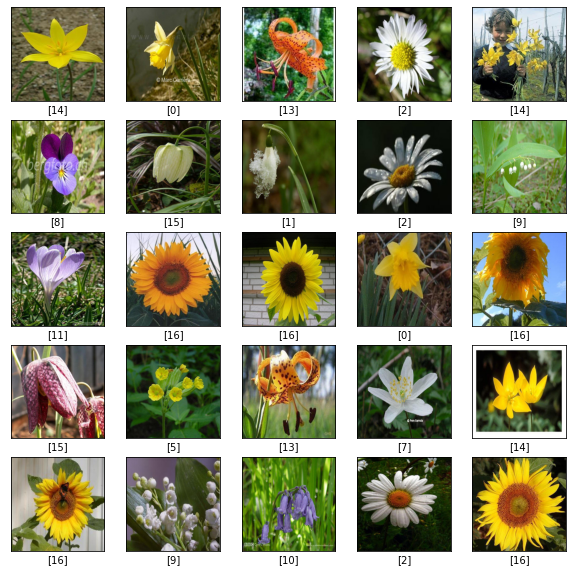

In [19]:
# dibujamos algunas flores
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10,10))

for i in range(25):
  plt.subplot(5,5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X[i])
  plt.xlabel(str(np.where(Y[i]==1)[0]))

# Crear el modelo

In [32]:
model = Sequential()

# primera convolucional
model.add( Conv2D( filters=96, kernel_size=(11,11), input_shape=(224, 224, 3),
                  strides=4, activation='relu', kernel_initializer='he_normal'))

model.add(BatchNormalization())

# pooling
model.add(MaxPool2D( (3,3), strides=(2,2), padding='valid'))

# segunda capa convolutiva
model.add(Conv2D( filters=256, kernel_size=(5,5), strides=(1,1), padding='same',
                activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())

# pooling
model.add(MaxPool2D((3,3), strides=(2,2), padding='valid'))

# tercera capa convolutiva
model.add(Conv2D( filters=384, kernel_size=(3,3), padding='same',
                 activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())



# cuarta capa convolutiva
model.add(Conv2D( filters=384, kernel_size=(3,3), padding='same',
                 activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())

model.add(Conv2D( filters=256, kernel_size=(3,3), padding='same',
                 activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())

# pooling
model.add(MaxPool2D((3,3), strides=2, padding='valid'))

# flatten
model.add(Flatten())

# primera capa densa
model.add(Dense(4096))
model.add(BatchNormalization())

# Dropout
model.add(Dropout(0.5))
model.add(Activation('relu'))

# segunda capa densa
model.add(Dense(4096))
model.add(BatchNormalization())

# Dropout
model.add(Dropout(0.5))
model.add(Activation('relu'))


# softmax ( clasifica a 17 tipos de flores)
model.add(Dense(17))
model.add(BatchNormalization())

# activacion
model.add(Activation('softmax'))

model.summary()


Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 54, 54, 96)        34944     
_________________________________________________________________
batch_normalization_26 (Batc (None, 54, 54, 96)        384       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 26, 26, 96)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 26, 26, 256)       614656    
_________________________________________________________________
batch_normalization_27 (Batc (None, 26, 26, 256)       1024      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 12, 12, 256)       0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 12, 12, 384)     

# Compilar el modelo

In [35]:
model.compile( optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name='Adam')
, loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenamiento

In [36]:
model.fit(X, Y, batch_size=32, epochs=15, verbose=1, validation_split=0.2, shuffle=True )

Train on 1088 samples, validate on 272 samples
Epoch 1/15
1088/1088 [==============================] - ETA: 0s - loss: 2.0580 - acc: 0.3621

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


1088/1088 [==============================] - 35s 33ms/sample - loss: 2.0580 - acc: 0.3621 - val_loss: 70.6650 - val_acc: 0.0551
Epoch 2/15
1088/1088 [==============================] - 4s 3ms/sample - loss: 1.4542 - acc: 0.6002 - val_loss: 5.8188 - val_acc: 0.1949
Epoch 3/15
1088/1088 [==============================] - 4s 3ms/sample - loss: 1.2017 - acc: 0.6884 - val_loss: 3.2868 - val_acc: 0.3051
Epoch 4/15
1088/1088 [==============================] - 4s 3ms/sample - loss: 1.0827 - acc: 0.7362 - val_loss: 3.1319 - val_acc: 0.2868
Epoch 5/15
1088/1088 [==============================] - 4s 3ms/sample - loss: 0.9408 - acc: 0.7730 - val_loss: 2.3568 - val_acc: 0.3419
Epoch 6/15
1088/1088 [==============================] - 4s 3ms/sample - loss: 0.8198 - acc: 0.8300 - val_loss: 2.4856 - val_acc: 0.3566
Epoch 7/15
1088/1088 [==============================] - 4s 3ms/sample - loss: 0.6795 - acc: 0.8658 - val_loss: 1.6379 - val_acc: 0.5588
Epoch 8/15
1088/1088 [==============================] - 